In this nodebook, we deal with airways in CT images.

We focus on small airways with diameter being around a few pixels.

In this case, a usual airway wall analysis might be unsuitable

because the image resolution is too low to correctly analyze the airway wall thickness.

Here, we look at the pixel intensities around the airway using persistent homology.

In [1]:
import pydicom as dicom
import cv2
import homcloud.interface as hc
import numpy as np
import matplotlib.pyplot as plt
import copy
import napari
from napari.utils import nbscreenshot

In [ ]:
###Load the image data.

In [2]:
lungImage=[]
for i in range (0,305):
    if i+1<10:
        d = dicom.read_file('PATH_TO_DATA\1-00'+str(i+1)+'.dcm')
    elif i+1<100:
        d = dicom.read_file('PATH_TO_DATA\1-0'+str(i+1)+'.dcm')
    else:
        d = dicom.read_file('PATH_TO_DATA\1-'+str(i+1)+'.dcm')
    lungImage.append(d.pixel_array)
lungImage=np.array(lungImage)

In [3]:
viewer=napari.view_image(lungImage)

Assistant skips harvesting pyclesperanto as it's not installed.


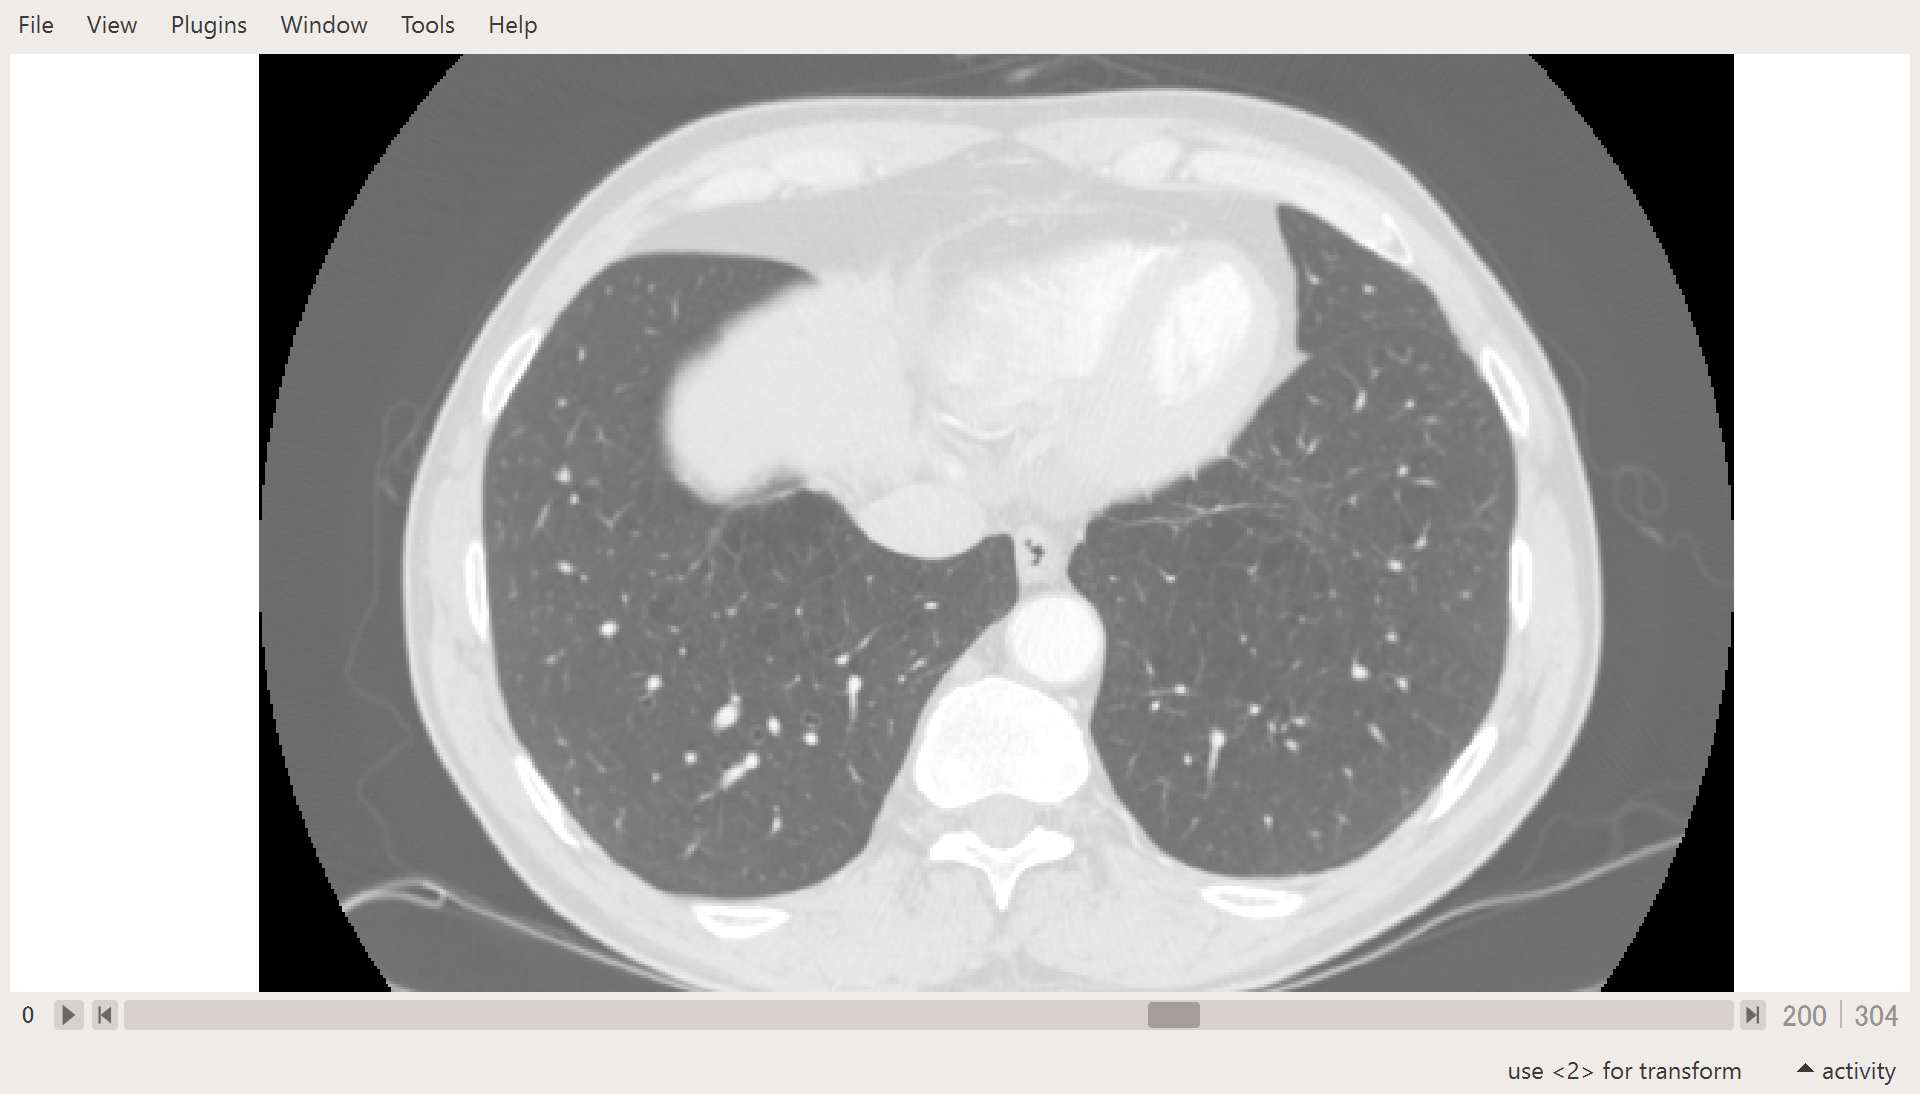

In [5]:
nbscreenshot(viewer)

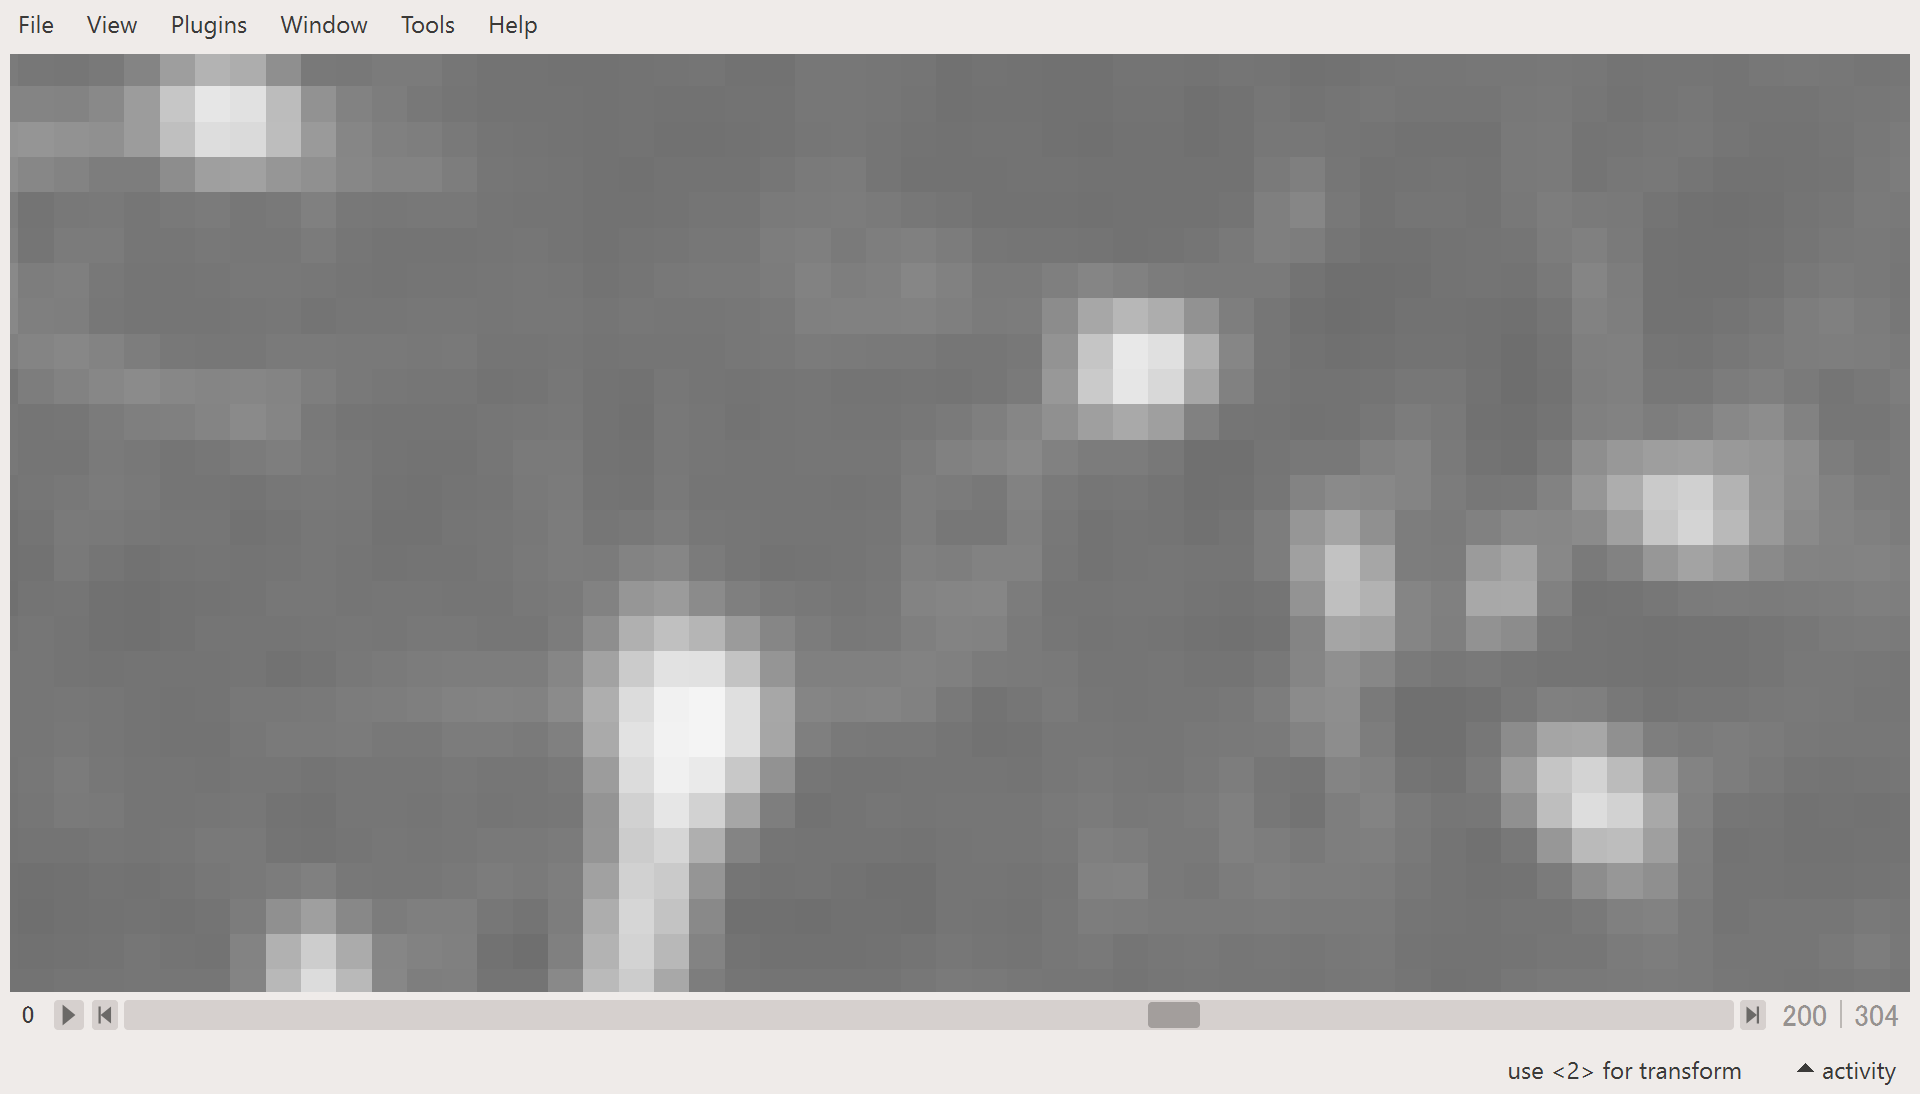

In [6]:
###We focus on a specific region as we usually do in airway wall analysis.
nbscreenshot(viewer)

In [ ]:
###We will look at the airway in the center of the above screenshot.

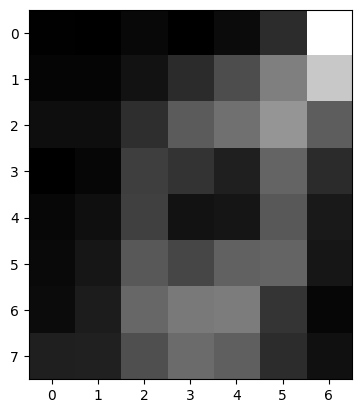

In [3]:
pict=lungImage[200][306:314,337:344]
plt.imshow(pict,cmap='gray')
plt.show()

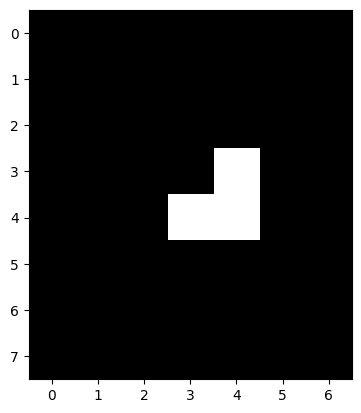

In [4]:
###We calculate persistent homology and record the node volumes corresponding to the detected structures.
###These correspond to the interior parts of the airways.
hc.BitmapPHTrees.for_bitmap_levelset(pict, "superlevel", save_to="grayscale-tree.pdgm")
phtrees = hc.PDList("grayscale-tree.pdgm").bitmap_phtrees(1)
h,w=pict.shape
mask=np.zeros((h,w))
for i in range (0,len(phtrees.nodes)):
    node=phtrees.nodes[i]
    spots=np.array(node.volume())
    spots_tr=np.transpose(spots)
    mask[(spots_tr[0],spots_tr[1])]=255
plt.imshow(mask,cmap='gray')
plt.show()

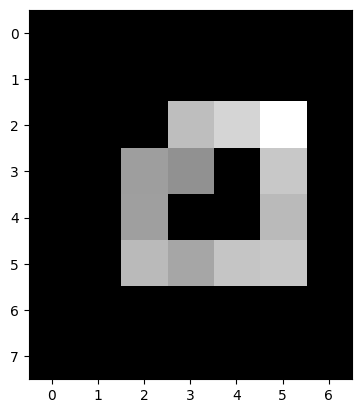

In [5]:
###Detecting the pixels around the above volume.
airwayNode=phtrees.nodes[0]###If you detect multiple nodes, you can specify the one of your interest here.
mask=np.zeros((h,w))
spots=np.array(airwayNode.volume())
spots_tr=np.transpose(spots)
mask[(spots_tr[0],spots_tr[1])]=255
dilated_mask=cv2.dilate(mask.astype('uint8'),kernel=np.array([[1,1,1],[1,1,1],[1,1,1]],dtype='uint8'),iterations=1)
pict_mask=pict*((dilated_mask-mask)>150)
plt.imshow(pict_mask,cmap='gray')
plt.show()

In [6]:
###Now we have the list of pixel intensities around the airway.
print(pict_mask[np.where(pict_mask)])

[206 231 277 171 157 217 173 202 202 180 214 217]


In [7]:
###We also have some other information in the detected node (e.g. the darkest pixel inside the airway).
airwayNode.death_time()

117.0